## pgmpy로 공부한 확률론
- 데이터사이언스스쿨 6장

### 1. 집합
- set: mutable 자료형, {} 기호
- frozenset: 내용 변경할 수 없는 immutable 자료형

#### 집합과 원소

In [40]:
A = set([1, 2, 3, 3, 2])  # 중복된 자료는 없어진다.
A

{1, 2, 3}

In [41]:
B = frozenset(['H', 'T'])
B

frozenset({'H', 'T'})

In [42]:
C = {"\u2660", "\u2661", "\u2662", "\u2663"}     # unicode character도 가능하다
C

{'♠', '♡', '♢', '♣'}

In [43]:
type(C)

set

#### 집합의 크기
- |A|=card(A)=3
- len(): 원소의 갯수

In [44]:
len(A), len(B), len(C)

(3, 2, 4)

#### 합집합과 교집합
- union, intersection 메서드
- |, & 연산자

In [45]:
A1 = set([1, 2, 3, 4])
A2 = set([2, 4, 6])
A3 = set([1, 2, 3])
A4 = set([2, 3, 4, 5, 6])

In [46]:
A1.union(A2)

{1, 2, 3, 4, 6}

In [47]:
A1 | A2

{1, 2, 3, 4, 6}

In [48]:
A3.intersection(A4)

{2, 3}

In [49]:
A4 & A3

{2, 3}

#### 전체집합, 부분집합, 여집합
- issubset() 메소드
- <= 연산자

In [50]:
A3.issubset(A1)

True

In [51]:
A3 <= A1

True

In [52]:
A3.issubset(A2)

False

In [53]:
A3 <= A3  # 모든 집합은 자기 자신의 부분집합이다.

True

In [54]:
A3 < A3  # 모든 집합은 자기 자신의 진부분집합이 아니다.

False

#### 차집합과 여집합
- difference() method
- '-' 연산자

In [55]:
A1.difference(A2)

{1, 3}

In [56]:
A1 - A2

{1, 3}

#### 공집합

In [57]:
empty_set = set([])
empty_set

set()

In [58]:
empty_set < A1

True

In [59]:
empty_set.intersection(A1)

set()

In [60]:
empty_set.union(A1)

{1, 2, 3, 4}

#### 부분집합

In [61]:
A = frozenset([])
B = frozenset(['H'])
C = frozenset(['T'])
D = frozenset(['H', 'T'])
set([A, B, C, D])

{frozenset(), frozenset({'H'}), frozenset({'T'}), frozenset({'H', 'T'})}

### 2. 확률
- 확률: 사건(부분집합)을 입력하면 숫자(확률값)가 출력되는 함수

In [62]:
P = {A: 0, B: 0.4, C: 0.6, D: 1}
P

{frozenset(): 0,
 frozenset({'H'}): 0.4,
 frozenset({'T'}): 0.6,
 frozenset({'H', 'T'}): 1}

### 4. 확률분포함수
- **확률분포(probability distribution)**: 어떤 사건에 어느 정도의 확률이 할당되었는지 묘사한 정보
> - 확률질량함수: 유한 개의 사건이 존재하는 경우 각 단순사건에 대한 확률만 정의하는 함수
> - 누적분포함수
       - 표본 수가 무한하고 모든 표본에 대해 표본 하나만을 가진 사건의 확률이 동일하다면, 표본 하나에 대한 사건의 확률은 언제나 0
       - F(x)=P(Sx)=P({X<x})Sx={−∞<X≤x}
> - 확률밀도함수: 누적분포함수를 미분하여 구한 도함수    

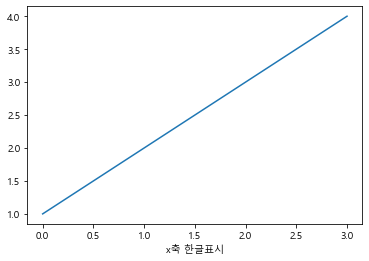

In [63]:
#한글 폰트 설정

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

plt.plot([1,2,3,4])
plt.xlabel('x축 한글표시')
plt.show()

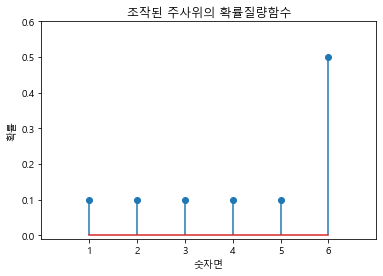

In [75]:
import numpy as np

# 확률질량함수
x = np.arange(1, 7)
y = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
plt.stem(x, y)                                  # x에 수직선, y값에 마크표시
plt.title("조작된 주사위의 확률질량함수")
plt.xlabel("숫자면")
plt.ylabel("확률")
plt.xlim(0, 7)
plt.ylim(-0.01, 0.6)
plt.xticks(np.arange(6) + 1)
plt.show()

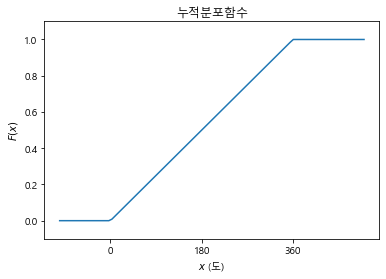

In [65]:
# 누적분포함수: 
t = np.linspace(-100, 500, 100)            # start, end, num : start부터 end까지 num개의 원소를 만들어라
F = t / 360   # 누적분포함수
F[t < 0] = 0
F[t > 360] = 1
plt.plot(t, F)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()

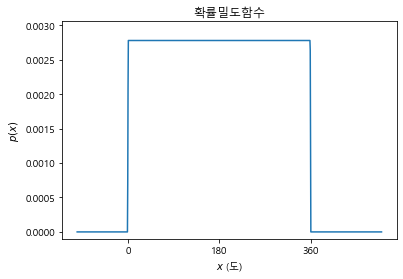

In [66]:
# 확률밀도함수
t = np.linspace(-100, 500, 1000)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1

p = np.gradient(F, 600/1000)  # 수치미분

plt.plot(t, p)
plt.ylim(-0.0001, p.max()*1.1)
plt.xticks([0, 180, 360])
plt.title("확률밀도함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$p(x)$")
plt.show()

### 결합확률과 조건부확률
- JointProbabilityDistribution 클래스: 결합확률 모형을 만드는 데 사용하는 클래스
> JointProbabilityDistribution(variables, cardinality, values)
    - variables: 확률변수의 이름 문자열의 리스트. 정의하려는 확률변수가 하나인 경우에도 리스트로 넣어야 한다.
    - cardinality: 각 확률변수의 표본 혹은 배타적 사건의 수의 리스트
    - values: 확률변수의 모든 표본(조합)에 대한 (결합)확률값의 리스트

In [67]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

px = JPD(['X'], [2], np.array([12, 8]) / 20)
print(px)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [68]:
# 확률변수 X와 확률변수 Y의 결합확률
pxy = JPD(['X', 'Y'], [2, 2], np.array([3, 9, 7, 1]) / 20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


- marginal_distribution(values, inplace=True): 주변확률분포
    - values: 주변확률을 구할 확률변수의 이름 문자열 리스트
    - inplace: True이면 객체 자신을 주변확률 모형으로 변화시킨다. False면 주변확률 모형 객체를 반환한다.

- marginalize(values, inplace=True): 주변확률
    - values: 어떤 확률변수의 주변확률을 구하기 위해 없앨 확률변수의 이름 문자열 리스트
    - inplace: True이면 객체 자신을 주변확률 모형으로 변화시킨다. False면 주변확률 모형 객체를 반환한다.
    
- conditional_distribution(values, inplace=True): 조건부확률분포
    - values: 주변확률을 구할 확률변수의 이름 문자열과 값을 묶은 튜플의 리스트
    - inplace: True이면 객체 자신을 조건부확률 모형으로 변화시킨다. False면 조건부확률 모형 객체를 반환한다.

In [69]:
pmx = pxy.marginal_distribution(['X'], inplace=False)
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [70]:
pmx = pxy.marginalize(['Y'], inplace=False)
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [71]:
py = pxy.marginal_distribution(['Y'], inplace=False)
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [72]:
py_on_x0 = pxy.conditional_distribution([('X', 0)], inplace=False)  # 사건 A에 대한 조건부확률
print(py_on_x0)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.2500 |
+------+--------+
| Y(1) | 0.7500 |
+------+--------+


In [73]:
py_on_x1 = pxy.conditional_distribution([('X', 1)], inplace=False)
print(py_on_x1)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.8750 |
+------+--------+
| Y(1) | 0.1250 |
+------+--------+
